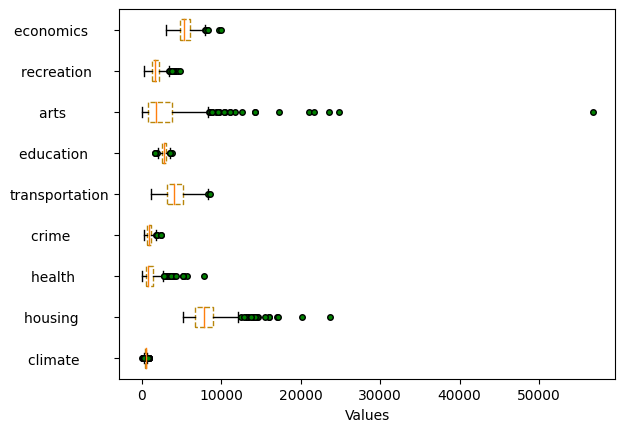

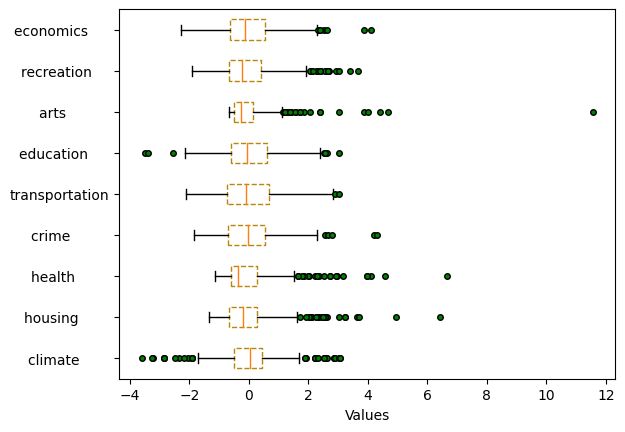

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
#D = loadmat(’city_quality.mat’)
#ratings = D[’ratings’]
#categories = D[’categories’]
df = pd.read_excel("city_quality.xlsx") #329個城市9項評比資料
ratings = np.array(df) #將資料從dataframe變成array
categories = df.columns #取出9個變數名稱的index
#index(["climate","housing",...])

fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green",markersize = 4, linestyle = "none")

ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, 
           labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()

#因為不同項目之間的數字大小與變異相差頗大，對主成分分析可能不利，因此先進行標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings) # 將資料進行標準化
# 繪製標準化後的圖形
fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green", markersize = 4, linestyle = "none")
ax.boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()

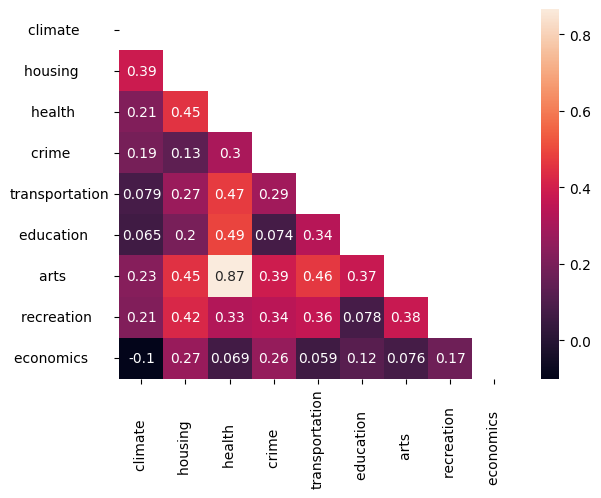

<Axes: >

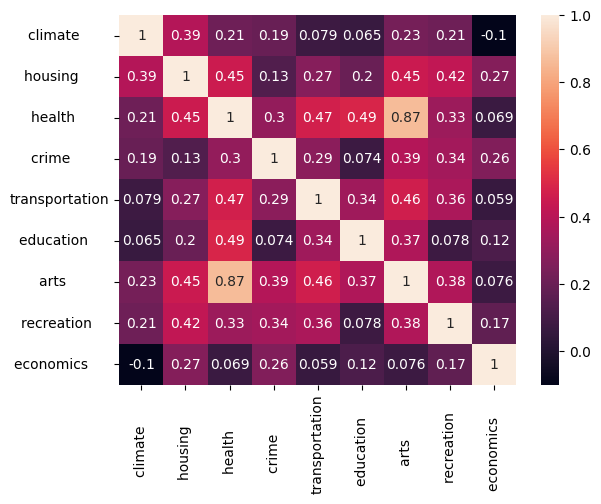

In [2]:
##correlation matrix
import seaborn
import pandas as pd
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask #呈現一半就好了
#seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')
seaborn.heatmap(R, annot = True, mask = mask)
plt.show()
seaborn.heatmap(R, annot = True)

In [3]:
# ratings_ is a 329 by 9 data matrix
Sx = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
print(Sx)
Tmp = ratings_ - np.tile(mu_x, (N, 1))
Sx_formula = Tmp.T @ Tmp / (N - 1)
print(Sx_formula)

[[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
   0.07590401  0.174059

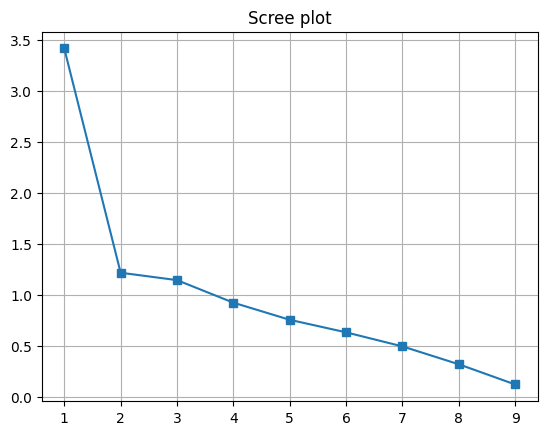

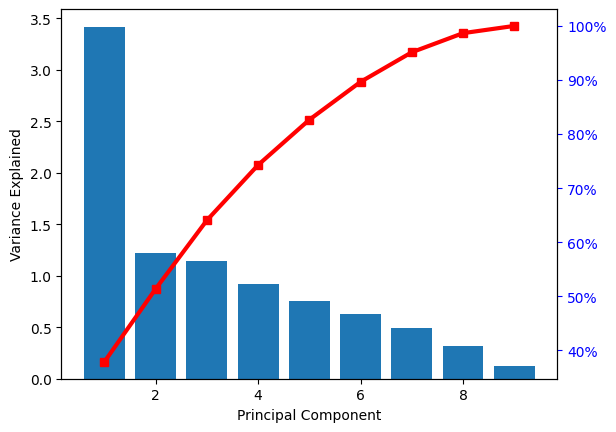

In [4]:
# 範例3
# 計算共變異數矩陣
mu_x = ratings_.mean(axis=0) #得到9個變數的observation mean
#(9,)
Tmp = ratings_ - mu_x #(329,9)
#(x-mu)^t (x-mu)

# 觀察變異數
Sx_numpy = np.cov(ratings_.T , bias = False) 
Sx = Tmp.T @ Tmp / (ratings_.shape[0] - 1) 
# 利用矩陣來進行處理
#Sx_numpy與Sx的結果應該要相同

# 另一種寫法
# N, p = ratings_.shape
# Sx_loop = np.zeros((p,p))
# for i in range(N):
#     tmp = ratings_[i, :] - mu_x
#     Sx_loop = Sx_loop + tmp.reshape(-1,1)
# Sx_loop = Sx_loop / (N-1)

# 計算特徵值與特徵向量
from numpy.linalg import eig
w, v = eig(Sx_numpy) #eigenvalue沒照大小排序
# 排序特徵值跟特徵向量
idx = np.argsort(w)[::-1]
eigvals = w[idx] #排序後之特徵值
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

from matplotlib.ticker import PercentFormatter
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker="s")
plt.title("Scree plot")
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
    marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="blue")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")
plt.show()